<img align=right src= "https://docpath.com/wp-content/uploads/benefits-of-using-java-programming-language.jpg" alt ="benefits-of-using-java-programming-language.jpg" style='width: 250px;'>

# **2020-2024 - Stack Overflow Developer Survey**
2020 - 2024 - Stack Overflow Developer Survey
My 4th Notebook. Downloaded all 5 years of the Developer Survey Results from:

* [https://survey.stackoverflow.co/](https://) and downloaded the 2020 - 2024 Surveys.

* 2020 - Nearly 65.000 Responded
* 2021 - Over 80.000 Responded
* 2022 - Over 70.000 Responded
* 2023 - Over 90.000 Responded
* 2024 - Over 65.000 Responded

**Image** used from - https://docpath.com/art-benefits-of-using-java-programming-language/?lang=it

**Seaborn Color** palet pie chart - [https://seaborn.pydata.org/generated/seaborn.color_palette.html](https://)


**In this notebook** I will try to give a clear overview of the outcome an several of the question results and compare over the 5 years for example about opinions, Program Language Uses and Wishes + AI opinions have changed for better or worse and more.
AI Specific questions only from 2023 and more indept in 2024. Gender they stopped asking from 2023.

**Multiple CSVs Some Advise** taken from - [https://saturncloud.io/blog/how-to-import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe/](https://)

# **Connect to Libraries & CSV**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install seaborn wordcloud #install seaborn and wordcloud
import wordcloud #import wordcloud
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#from sklearn.linear_model import LinearRegression, Ridge
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import cross_val_score, train_test_split
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import warnings
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/2020-2024-stack-overflow-developer-survey/2023 - survey_results_public.csv
/kaggle/input/2020-2024-stack-overflow-developer-survey/2022 - survey_results_public.csv
/kaggle/input/2020-2024-stack-overflow-developer-survey/2020 - survey_results_public.csv
/kaggle/input/2020-2024-stack-overflow-developer-survey/2024 - survey_results_public.csv
/kaggle/input/2020-2024-stack-overflow-developer-survey/2021 - survey_results_public.csv


In [2]:
#connect to the Original CSV Files
survey_2020= '/kaggle/input/2020-2024-stack-overflow-developer-survey/2020 - survey_results_public.csv'
survey_2021= '/kaggle/input/2020-2024-stack-overflow-developer-survey/2021 - survey_results_public.csv'
survey_2022= '/kaggle/input/2020-2024-stack-overflow-developer-survey/2022 - survey_results_public.csv'
survey_2023= '/kaggle/input/2020-2024-stack-overflow-developer-survey/2023 - survey_results_public.csv'
survey_2024= '/kaggle/input/2020-2024-stack-overflow-developer-survey/2024 - survey_results_public.csv'

# **Check Datasets & Extract Columns Convert to New CSV**

In [3]:
#Load Original datasets per year head (2)
#2020
df_survey_2020 = pd.read_csv(survey_2020)
df_survey_2020.head(2)
#2021
df_survey_2021 = pd.read_csv(survey_2021)
df_survey_2021.head(2)
#2022
df_survey_2022 = pd.read_csv(survey_2022)
df_survey_2022.head(2)
#2023
df_survey_2023 = pd.read_csv(survey_2023)
df_survey_2023.head(2)
#2024
df_survey_2024 = pd.read_csv(survey_2024)
df_survey_2024.head(2)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Original numbers of rows & columns per year
#df_survey_2020.shape #64461, 61
#df_survey_2021.shape #83439, 48
#df_survey_2022.shape #73268, 79
#df_survey_2023.shape #89184, 84
#df_survey_2024.shape #65437, 114

# **New CSV Files per Year + Rename view Headers**

In [5]:
df_survey_2020_new = pd.read_csv('/kaggle/input/2020-2024-stack-overflow-developer-survey/2020 - survey_results_public.csv', usecols = ['MainBranch','Age','Country','Employment','EdLevel','YearsCode','DevType','LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','CompTotal','Gender'])
df_survey_2020_new.head(2)

df_survey_2021_new = pd.read_csv('/kaggle/input/2020-2024-stack-overflow-developer-survey/2021 - survey_results_public.csv', usecols = ['MainBranch','Age','Country','Employment','EdLevel','YearsCode','DevType','LanguageHaveWorkedWith','LanguageWantToWorkWith','DatabaseHaveWorkedWith','DatabaseWantToWorkWith','PlatformHaveWorkedWith','PlatformWantToWorkWith','CompTotal','Gender'])
df_survey_2021_new.head(2)

df_survey_2022_new = pd.read_csv('/kaggle/input/2020-2024-stack-overflow-developer-survey/2022 - survey_results_public.csv', usecols = ['MainBranch','Age','Country','Employment','EdLevel','YearsCode','DevType','LanguageHaveWorkedWith','LanguageWantToWorkWith','DatabaseHaveWorkedWith','DatabaseWantToWorkWith','PlatformHaveWorkedWith','PlatformWantToWorkWith','CompTotal','Gender'])
df_survey_2022_new.head(2)

df_survey_2023_new = pd.read_csv('/kaggle/input/2020-2024-stack-overflow-developer-survey/2023 - survey_results_public.csv', usecols = ['MainBranch','Age','Country','Employment','EdLevel','YearsCode','DevType','LanguageHaveWorkedWith','LanguageWantToWorkWith','DatabaseHaveWorkedWith','DatabaseWantToWorkWith','PlatformHaveWorkedWith','PlatformWantToWorkWith','CompTotal','AISearchHaveWorkedWith','AISearchWantToWorkWith','AISelect','AISent','AIBen','AIToolCurrently Using'])
df_survey_2023_new.head(2)

df_survey_2024_new = pd.read_csv('/kaggle/input/2020-2024-stack-overflow-developer-survey/2024 - survey_results_public.csv', usecols = ['MainBranch','Age','Country','Employment','EdLevel','YearsCode','DevType','LanguageHaveWorkedWith','LanguageWantToWorkWith','DatabaseHaveWorkedWith','DatabaseWantToWorkWith','PlatformHaveWorkedWith','PlatformWantToWorkWith','CompTotal','AISearchDevHaveWorkedWith','AISearchDevWantToWorkWith','AISelect','AISent','AIBen','AIToolCurrently Using','AIAcc','AIComplex','AIThreat','AIEthics','AIChallenges'])
df_survey_2024_new.head(2)

,MainBranch,Age,Employment,EdLevel,YearsCode,DevType,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,AISearchDevWantToWorkWith,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIThreat,AIEthics,AIChallenges
0,I am a developer by profession,Under 18 years old,"Employed, full-time",Primary/elementary school,NaN,NaN,United States of America,NaN,NaN,NaN,...,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,...,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Rename some Headers
df_survey_2020_new = df_survey_2020_new.rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})
df_survey_2020_new = df_survey_2020_new.rename(columns={'DatabaseDesireNextYear': 'DatabaseWantToWorkWith'})
df_survey_2020_new = df_survey_2020_new.rename(columns={'PlatformDesireNextYear': 'PlatformWantToWorkWith'})
df_survey_2020_new = df_survey_2020_new.rename(columns={'DatabaseWorkedWith': 'DatabaseHaveWorkedWith'})
df_survey_2020_new = df_survey_2020_new.rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
df_survey_2020_new = df_survey_2020_new.rename(columns={'PlatformWorkedWith': 'PlatformHaveWorkedWith'})
df_survey_2024_new = df_survey_2024_new.rename(columns={'AISearchDevHaveWorkedWith': 'AISearchHaveWorkedWith'})
df_survey_2024_new = df_survey_2024_new.rename(columns={'AISearchDevWantToWorkWith': 'AISearchWantToWorkWith'})

In [7]:
#New CSV files per year with Extracted Columns
#create new CSV 2020
df_survey_2020_new.to_csv('new_survey_2020.csv' , index = False)
df_survey_2020_new

survey_2020_new = 'new_survey_2020.csv'
df_survey_2020_new = pd.read_csv(survey_2020_new)
df_survey_2020_new.head(2)

#create new CSV 2021
df_survey_2021_new.to_csv('new_survey_2021.csv' , index = False)
df_survey_2021_new

survey_2021_new = 'new_survey_2021.csv'
df_survey_2021_new = pd.read_csv(survey_2021_new)
df_survey_2021_new.head(2)

#create new CSV 2022
df_survey_2022_new.to_csv('new_survey_2022.csv' , index = False)
df_survey_2022_new

survey_2022_new = 'new_survey_2022.csv'
df_survey_2022_new = pd.read_csv(survey_2022_new)
df_survey_2022_new.head(2)

#create new CSV 2023
df_survey_2023_new.to_csv('new_survey_2023.csv' , index = False)
df_survey_2023_new

survey_2023_new = 'new_survey_2023.csv'
df_survey_2023_new = pd.read_csv(survey_2023_new)
df_survey_2023_new.head(2)

#create new CSV 2024
df_survey_2024_new.to_csv('new_survey_2024.csv' , index = False)
df_survey_2024_new

survey_2024_new = 'new_survey_2024.csv'
df_survey_2024_new = pd.read_csv(survey_2024_new)
df_survey_2024_new.head(2)

,MainBranch,Age,Employment,EdLevel,YearsCode,DevType,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,AISearchWantToWorkWith,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIThreat,AIEthics,AIChallenges
0,I am a developer by profession,Under 18 years old,"Employed, full-time",Primary/elementary school,NaN,NaN,United States of America,NaN,NaN,NaN,...,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,...,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Correct Data Type "age" in 2020 to Object
df_survey_2020_new['Age'] = df_survey_2020_new['Age'].astype('object')

In [9]:
#New numbers of rows & columns per year
#df_survey_2020_new.shape #64461, 15
#df_survey_2021_new.shape #83439, 15
#df_survey_2022_new.shape #73268, 15
#df_survey_2023_new.shape #89184, 20
#df_survey_2024_new.shape #65437, 25

# **Age Group Per Year + Bar Chart**
I excluded 2020 from the Bar chart as the survey was based on single ages and not on Age group.

**From the chart its clear that**
* Each year most of the Respondents fall in the 25 - 34 age group, although less in 2023 the number dropped a bit.
* in 2023 there was a slight increase in the 65 years or older age group
* 2024 overal age group reduced despite having the most respondents
* More People share their Age each year

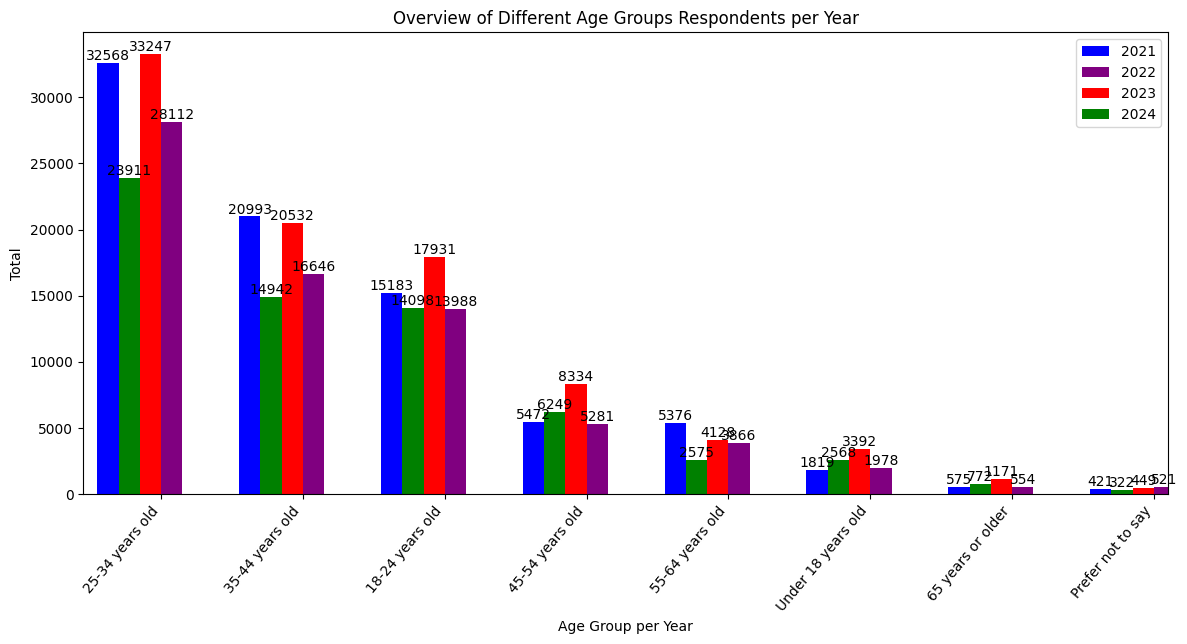

In [10]:
#1. Read the CSV files into pandas DataFrames:
#df_2020 = pd.read_csv('new_survey_2020.csv')
df_2021 = pd.read_csv('new_survey_2021.csv')
df_2022 = pd.read_csv('new_survey_2022.csv')
df_2023 = pd.read_csv('new_survey_2023.csv')
df_2024 = pd.read_csv('new_survey_2024.csv')

#2. Create a bar chart with separate bars per age group per year:

fig, ax = plt.subplots(figsize=(14, 6))
#df_2020['Age'].value_counts().plot(kind='bar', position=0, width=0.2, color='purple', align='center', label='2020', ax=ax)
df_2021['Age'].value_counts().plot(kind='bar', position=3, width=0.15, color='blue', align='center', label='2021', ax=ax)
df_2022['Age'].value_counts().plot(kind='bar', position=0, width=0.15, color='purple', align='center', label='2022', ax=ax)
df_2023['Age'].value_counts().plot(kind='bar', position=1, width=0.15, color='red', align='center', label='2023', ax=ax)
df_2024['Age'].value_counts().plot(kind='bar', position=2, width=0.15, color='green', align='center', label='2024', ax=ax)

#Label + title setup
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.xlabel('Age Group per Year')
plt.ylabel('Total')
plt.xticks(rotation=50,horizontalalignment="right")
plt.title('Overview of Different Age Groups Respondents per Year')
plt.legend()
plt.show()

# **Gender Respondent - 2020 - 2023 + Bar Chart**

As mentioned Stack Overflow stopped asking from 2023 if the respondent were Male/Female/etc.
Below chart is clear that it does not add extra value to the survey.
* in 2022 there was a slight increase of Female respondents

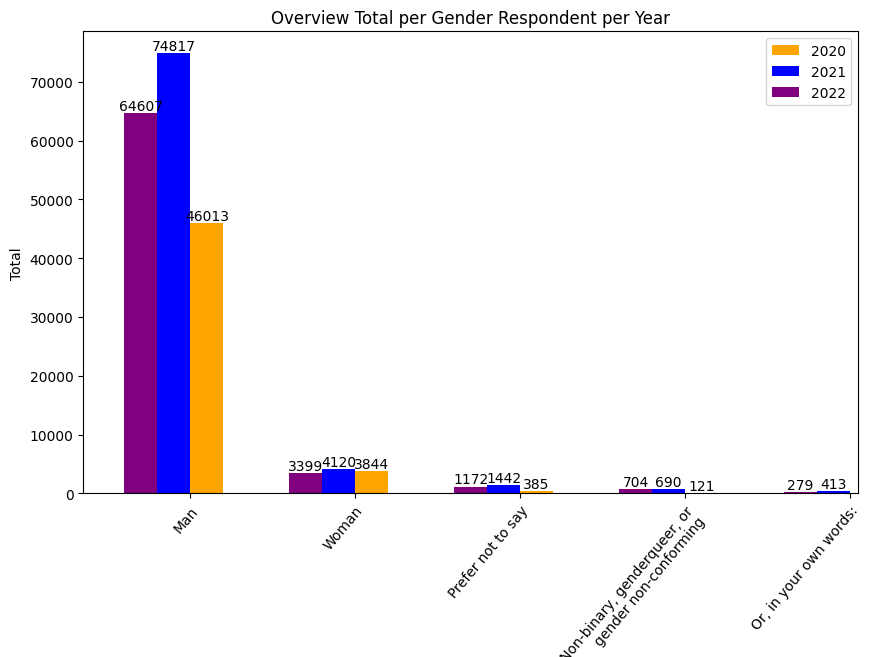

In [11]:
#1. Read the CSV files into pandas DataFrames:
df_2020 = pd.read_csv('new_survey_2020.csv')
df_2021 = pd.read_csv('new_survey_2021.csv')
df_2022 = pd.read_csv('new_survey_2022.csv')

#2. Create a bar chart with separate bars per Gender group per year (Top 5):

fig, ax = plt.subplots(figsize=(10, 6))
df_2020['Gender'].value_counts()[:5].plot(kind='bar', position=0, width=0.2, color='orange', align='center', label='2020', ax=ax)
df_2021['Gender'].value_counts()[:5].plot(kind='bar', position=1, width=0.2, color='blue', align='center', label='2021', ax=ax)
df_2022['Gender'].value_counts()[:5].plot(kind='bar', position=2, width=0.2, color='purple', align='center', label='2022', ax=ax)

#Label + title setup
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

plt.xlabel('Main Branch Respondent per Year')
plt.ylabel('Total')
plt.xticks(rotation=50,horizontalalignment="right", wrap=True)
plt.title('Overview Total per Gender Respondent per Year')
plt.legend()
plt.show()

# **Professional Developer, Study or Hobby + Bar Chart**
* Every year most of the Respondents are a Professional Developer
* The number of Professionals increased significantly
* In 2024 the number dropped the most, but keep in mind, 2024 had around 25000 less respondents than in 2023
* 2022 & 2023 there was an increase of code for study/Hobby and sometimes for work
* Number of Respondents that are no longer a Professional Developer is more or less steady

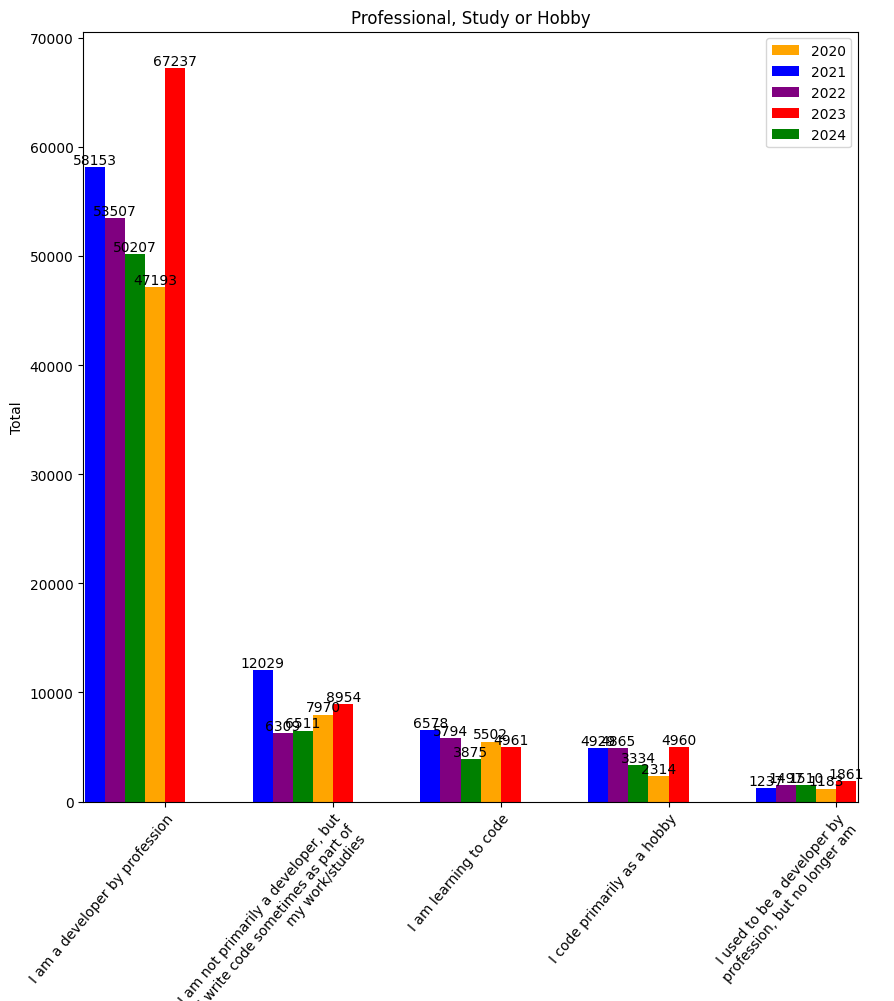

In [12]:
#1. Read the CSV files into pandas DataFrames:
df_2020 = pd.read_csv('new_survey_2020.csv')
df_2021 = pd.read_csv('new_survey_2021.csv')
df_2022 = pd.read_csv('new_survey_2022.csv')
df_2023 = pd.read_csv('new_survey_2023.csv')
df_2024 = pd.read_csv('new_survey_2024.csv')

#2. Create a bar chart with separate bars per Main Branch group per year:

fig, ax = plt.subplots(figsize=(10, 10))
df_2020['MainBranch'].value_counts()[:5].plot(kind='bar', position=1, width=0.12, color='orange', align='center', label='2020', ax=ax)
df_2021['MainBranch'].value_counts()[:5].plot(kind='bar', position=4, width=0.12, color='blue', align='center', label='2021', ax=ax)
df_2022['MainBranch'].value_counts()[:5].plot(kind='bar', position=3, width=0.12, color='purple', align='center', label='2022', ax=ax)
df_2023['MainBranch'].value_counts()[:5].plot(kind='bar', position=0, width=0.12, color='red', align='center', label='2023', ax=ax)
df_2024['MainBranch'].value_counts()[:5].plot(kind='bar', position=2, width=0.12, color='green', align='center', label='2024', ax=ax)

#Label + title setup
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])

plt.xlabel('Type of Profession level per Year')
plt.ylabel('Total')
plt.xticks(rotation=50,horizontalalignment="right", wrap=True)
plt.title('Professional, Study or Hobby')
plt.legend()
plt.show()

# **Education Level + Bar Chart**

* The Top Education is still Bachelors followed by Masters Degree.
2023 had the highest number of Respondents.
* And you see some spikes over the years for secondary, some type of degree or Primary/Elementary School

Proofing that people with no degrees get changes as well in the Tech market.

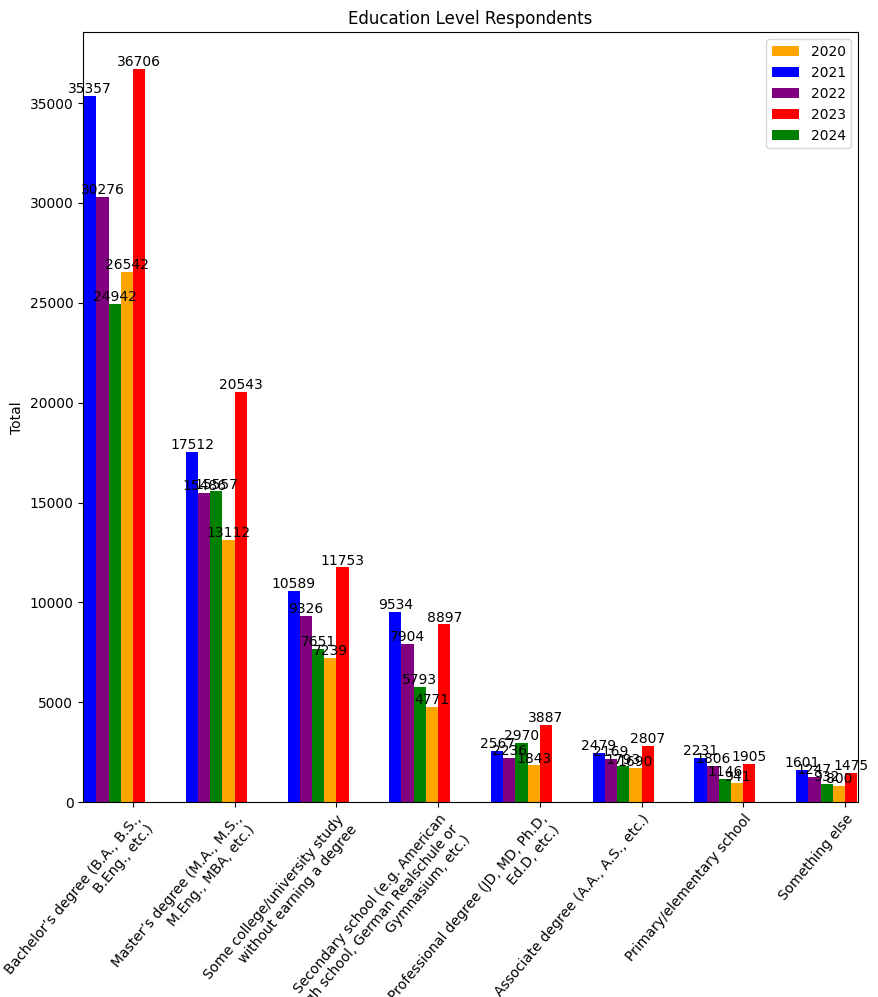

In [13]:
#1. Read the CSV files into pandas DataFrames:
df_2020 = pd.read_csv('new_survey_2020.csv')
df_2021 = pd.read_csv('new_survey_2021.csv')
df_2022 = pd.read_csv('new_survey_2022.csv')
df_2023 = pd.read_csv('new_survey_2023.csv')
df_2024 = pd.read_csv('new_survey_2024.csv')

#2. Create a bar chart with separate bars per Respondent Education Level per year:

fig, ax = plt.subplots(figsize=(10, 10))
df_2020['EdLevel'].value_counts()[:10].plot(kind='bar', position=1, width=0.12, color='orange', align='center', label='2020', ax=ax)
df_2021['EdLevel'].value_counts()[:10].plot(kind='bar', position=4, width=0.12, color='blue', align='center', label='2021', ax=ax)
df_2022['EdLevel'].value_counts()[:10].plot(kind='bar', position=3, width=0.12, color='purple', align='center', label='2022', ax=ax)
df_2023['EdLevel'].value_counts()[:10].plot(kind='bar', position=0, width=0.12, color='red', align='center', label='2023', ax=ax)
df_2024['EdLevel'].value_counts()[:10].plot(kind='bar', position=2, width=0.12, color='green', align='center', label='2024', ax=ax)

#Label + title setup
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])

plt.xlabel('Type of Education level per Year')
plt.ylabel('Total')
plt.xticks(rotation=50,horizontalalignment="right", wrap=True)
plt.title('Education Level Respondents')
plt.legend()
plt.show()

# **Top 10 Programming Languages Used vs Wished - Pie Charts**

# **Most used vs Most wish to use in the Future**
* 2020-Pie 1:Most Used - HTML/CSS/JavaScript/PHP/SQL
* 2020-Pie 2:Most Wished - Python
* 2021-Pie 3:Most Used - Python
* 2021-Pie 4:Most Wished - Python
* 2022-Pie 5:Most Used - HTML/CSS/JavaScript/TypeScript
* 2022-Pie 6:Most Wished - Python
* 2023-Pie 7:Most Used - HTML/CSS/JavaScript/TypeScript
* 2023-Pie 8:Most Wished - Rust
* 2024-Pie 9:Most Used - HTML/CSS/JavaScript/TypeScript
* 2024-Pie 10:Most Wished - Python

* **->Comment 1** - While Go & Rust show up each year top 10 wish list but never end up in the top 10 in 2021,2022,2023,2024
* **->Comment 2** - Python was in 2020 shared 4th/5th place the other years it was either on the 1st or 2nd place, and still high up on the wish list.

(<Axes: title={'center': '2020 - Top 10 Currently Most used Languages'}, ylabel='count'>,
 <Axes: title={'center': '2020 - Top 10 Languages wish to use/learn'}, ylabel='count'>,
 <Axes: title={'center': '2021 - Top 10 Currently Most used Languages'}, ylabel='count'>,
 <Axes: title={'center': '2021 - Top 10 Languages wish to use/learn'}, ylabel='count'>,
 <Axes: title={'center': '2022 - Top 10 Currently Most used Languages'}, ylabel='count'>,
 <Axes: title={'center': '2022 - Top 10 Languages wish to use/learn'}, ylabel='count'>,
 <Axes: title={'center': '2023 - Top 10 Currently Most used Languages'}, ylabel='count'>,
 <Axes: title={'center': '2023 - Top 10 Languages wish to use/learn'}, ylabel='count'>,
 <Axes: title={'center': '2024 - Top 10 Currently Most used Languages'}, ylabel='count'>,
 <Axes: title={'center': '2024 - Top 10 Languages wish to use/learn'}, ylabel='count'>)

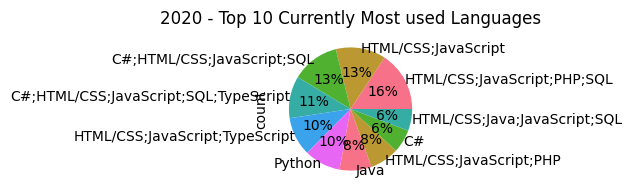

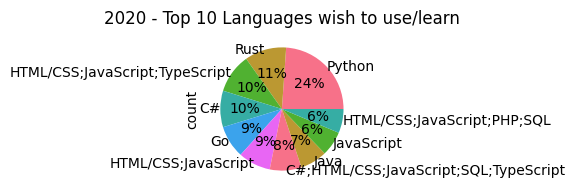

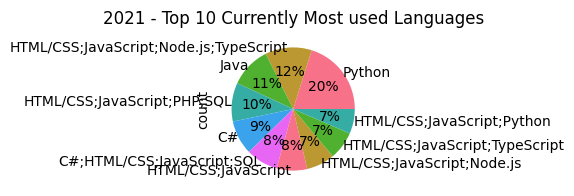

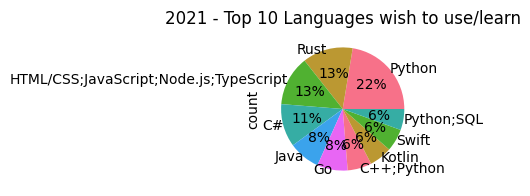

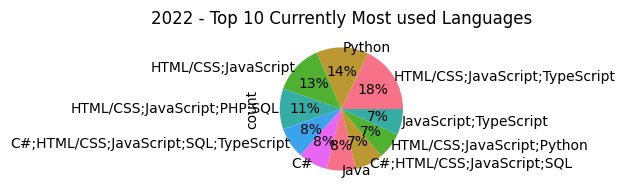

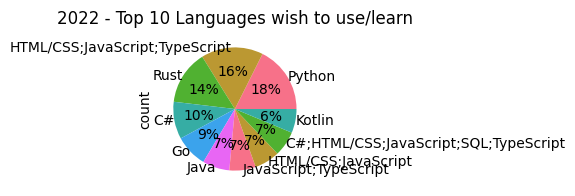

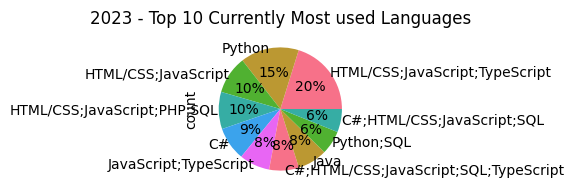

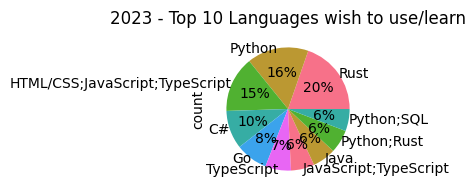

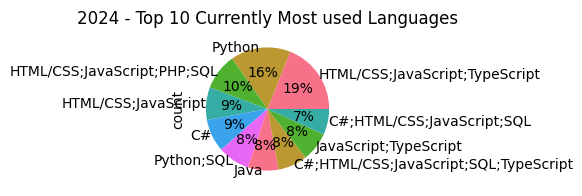

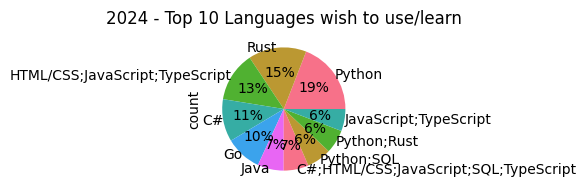

In [14]:
#1. Read the CSV files into pandas DataFrames:
df_2020 = pd.read_csv('new_survey_2020.csv')
df_2021 = pd.read_csv('new_survey_2021.csv')
df_2022 = pd.read_csv('new_survey_2022.csv')
df_2023 = pd.read_csv('new_survey_2023.csv')
df_2024 = pd.read_csv('new_survey_2024.csv')

#Top 10 Most Worked with Programming Languages vs Wish to Work/Learn in Future
#2020 worked
ax1 = fig1,(ax1)=plt.subplots(figsize=(4,2))
#Top 10 Most Worked with Languages + Pie Chart
ax1=palette_color = sns.color_palette("husl")
ax1=df_2020['LanguageHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2020 - Top 10 Currently Most used Languages',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2020 Wish to work
ax2 = fig2,(ax2)= plt.subplots(figsize=(4,2))

#Top 10 Wish to Work/learn Languages + Pie Chart
ax2=palette_color = sns.color_palette("husl")
ax2=df_2020['LanguageWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2020 - Top 10 Languages wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2021 worked
ax3 = fig3,(ax3)=plt.subplots(1,figsize=(4,2))
#Top 10 Most Worked with Languages + Pie Chart
ax3=palette_color = sns.color_palette("husl")
ax3=df_2021['LanguageHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2021 - Top 10 Currently Most used Languages',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2021 Wish to work
ax4 = fig4,(ax4)= plt.subplots(1,figsize=(4,2))

#Top 10 Wish to Work/learn Languages + Pie Chart
ax4=palette_color = sns.color_palette("husl")
ax4=df_2021['LanguageWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2021 - Top 10 Languages wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2022 worked
ax5 = fig5,(ax5)=plt.subplots(1,figsize=(4,2))
#Top 10 Most Worked with Languages + Pie Chart
ax5=palette_color = sns.color_palette("husl")
ax5=df_2022['LanguageHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2022 - Top 10 Currently Most used Languages',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2022 Wish to work
ax6 = fig6,(ax6)= plt.subplots(1,figsize=(4,2))

#Top 10 Wish to Work/learn Languages + Pie Chart
ax6=palette_color = sns.color_palette("husl")
ax6=df_2022['LanguageWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2022 - Top 10 Languages wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2023 worked
ax7 = fig7,(ax7)=plt.subplots(1,figsize=(4,2))
#Top 10 Most Worked with Languages + Pie Chart
ax7=palette_color = sns.color_palette("husl")
ax7=df_2023['LanguageHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2023 - Top 10 Currently Most used Languages',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2023 Wish to work
ax8 = fig8,(ax8)= plt.subplots(1,figsize=(4,2))

#Top 10 Wish to Work/learn Languages + Pie Chart
ax8=palette_color = sns.color_palette("husl")
ax8=df_2023['LanguageWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2023 - Top 10 Languages wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2024worked
ax9 = fig9,(ax9)=plt.subplots(1,figsize=(4,2))
#Top 10 Most Worked with Languages + Pie Chart
ax9=palette_color = sns.color_palette("husl")
ax9=df_2024['LanguageHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2024 - Top 10 Currently Most used Languages',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2024 Wish to work
ax10 = fig10,(ax10)= plt.subplots(1,figsize=(4,2))

#Top 10 Wish to Work/learn Languages + Pie Chart
ax10=palette_color = sns.color_palette("husl")
ax10=df_2024['LanguageWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2024 - Top 10 Languages wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10

# **Top 10 Databases Used vs Wished - Pie Charts**

# **Most used vs Most wish to use in the Future**
* 2020-Pie 1:Most Used - MySQL
* 2020-Pie 2:Most Wished - PostgreSQL
* 2021-Pie 3:Most Used - MySQL
* 2021-Pie 4:Most Wished - PostgreSQL
* 2022-Pie 5:Most Used - MySQL
* 2022-Pie 6:Most Wished - PostgreSQL
* 2023-Pie 7:Most Used - PostgreSQL
* 2023-Pie 8:Most Wished - PostgreSQL
* 2024-Pie 9:Most Used - PostgreSQL
* 2024-Pie 10:Most Wished - PostgreSQL

* **->Comment 1** - Firebase was on the 2020 wish list and showed up in the top 10 Most used in 2021.

* **->Comment 2** - All types of SQL Databases are consistant in usage and wish to learn in the future. With "PostgreSQL" growing each year more on both use and wish list.

(<Axes: title={'center': '2020 - Top 10 Currently Most used Databases'}, ylabel='count'>,
 <Axes: title={'center': '2020 - Top 10 Databases wish to use/learn'}, ylabel='count'>,
 <Axes: title={'center': '2021 - Top 10 Currently Most used Databases'}, ylabel='count'>,
 <Axes: title={'center': '2021 - Top 10 Databases wish to use/learn'}, ylabel='count'>,
 <Axes: title={'center': '2022 - Top 10 Currently Most used Databases'}, ylabel='count'>,
 <Axes: title={'center': '2022 - Top 10 Databases wish to use/learn'}, ylabel='count'>,
 <Axes: title={'center': '2023 - Top 10 Currently Most used Databases'}, ylabel='count'>,
 <Axes: title={'center': '2023 - Top 10 Databases wish to use/learn'}, ylabel='count'>,
 <Axes: title={'center': '2024 - Top 10 Currently Most used Databases'}, ylabel='count'>,
 <Axes: title={'center': '2024 - Top 10 Databases wish to use/learn'}, ylabel='count'>)

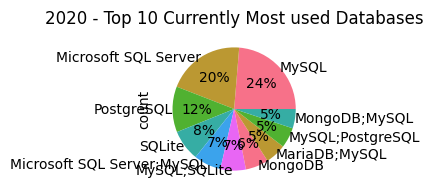

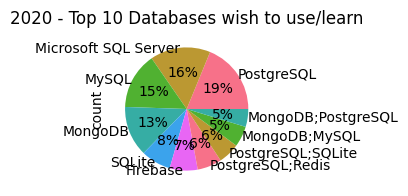

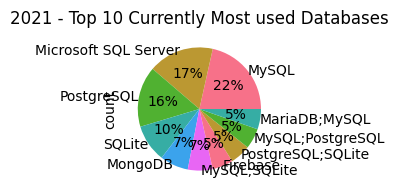

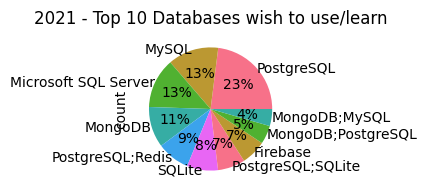

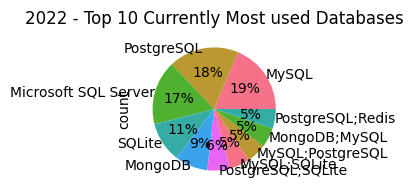

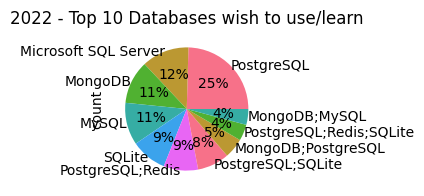

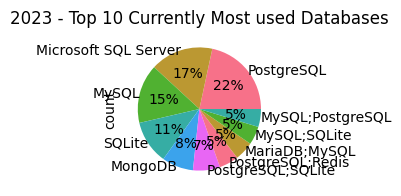

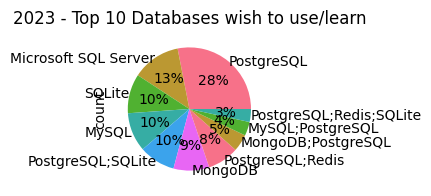

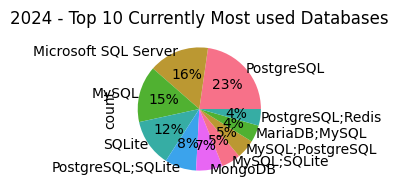

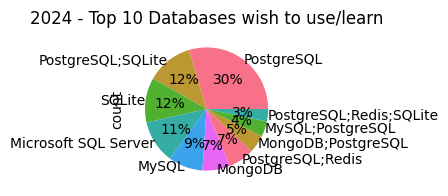

In [15]:
#1. Read the CSV files into pandas DataFrames:
df_2020 = pd.read_csv('new_survey_2020.csv')
df_2021 = pd.read_csv('new_survey_2021.csv')
df_2022 = pd.read_csv('new_survey_2022.csv')
df_2023 = pd.read_csv('new_survey_2023.csv')
df_2024 = pd.read_csv('new_survey_2024.csv')

#Top 10 Most Worked with Database vs Wish to Work/Learn in Future
#2020 worked
ax1 = fig1,(ax1)=plt.subplots(figsize=(4,2))
#Top 10 Most Worked with Database + Pie Chart
ax1=palette_color = sns.color_palette("husl")
ax1=df_2020['DatabaseHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2020 - Top 10 Currently Most used Databases',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2020 Wish to work
ax2 = fig2,(ax2)= plt.subplots(figsize=(4,2))

#Top 10 Wish to Work/learn Database + Pie Chart
ax2=palette_color = sns.color_palette("husl")
ax2=df_2020['DatabaseWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2020 - Top 10 Databases wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2021 worked
ax3 = fig3,(ax3)=plt.subplots(1,figsize=(4,2))
#Top 10 Most Worked with Database + Pie Chart
ax3=palette_color = sns.color_palette("husl")
ax3=df_2021['DatabaseHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2021 - Top 10 Currently Most used Databases',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2021 Wish to work
ax4 = fig4,(ax4)= plt.subplots(1,figsize=(4,2))

#Top 10 Wish to Work/learn Database + Pie Chart
ax4=palette_color = sns.color_palette("husl")
ax4=df_2021['DatabaseWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2021 - Top 10 Databases wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2022 worked
ax5 = fig5,(ax5)=plt.subplots(1,figsize=(4,2))
#Top 10 Most Worked with Database + Pie Chart
ax5=palette_color = sns.color_palette("husl")
ax5=df_2022['DatabaseHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2022 - Top 10 Currently Most used Databases',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2022 Wish to work
ax6 = fig6,(ax6)= plt.subplots(1,figsize=(4,2))

#Top 10 Wish to Work/learn Database + Pie Chart
ax6=palette_color = sns.color_palette("husl")
ax6=df_2022['DatabaseWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2022 - Top 10 Databases wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2023 worked
ax7 = fig7,(ax7)=plt.subplots(1,figsize=(4,2))
#Top 10 Most Worked with Database + Pie Chart
ax7=palette_color = sns.color_palette("husl")
ax7=df_2023['DatabaseHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2023 - Top 10 Currently Most used Databases',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2023 Wish to work
ax8 = fig8,(ax8)= plt.subplots(1,figsize=(4,2))

#Top 10 Wish to Work/learn Database + Pie Chart
ax8=palette_color = sns.color_palette("husl")
ax8=df_2023['DatabaseWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2023 - Top 10 Databases wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2024worked
ax9 = fig9,(ax9)=plt.subplots(1,figsize=(4,2))
#Top 10 Most Worked with Database + Pie Chart
ax9=palette_color = sns.color_palette("husl")
ax9=df_2024['DatabaseHaveWorkedWith'].value_counts()[:10].plot.pie( 
rot=0,title='2024 - Top 10 Currently Most used Databases',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
#2024 Wish to work
ax10 = fig10,(ax10)= plt.subplots(1,figsize=(4,2))

#Top 10 Wish to Work/learn Database + Pie Chart
ax10=palette_color = sns.color_palette("husl")
ax10=df_2024['DatabaseWantToWorkWith'].value_counts()[:10].plot.pie(
rot=0,title='2024 - Top 10 Databases wish to use/learn',colors=palette_color,autopct='%.0f%%', labeldistance=1.0)
##
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10

# **AI**

# **AI- From 2023 & 2024 Survey - Use, Plan to Use or Never + Bar Charts**
Comparing 3 different Responses for AI 2023 vs 2024. In the 3 years before ,these questions were not on the Survey:
* **Fig 1** - In 2023 AI was most used. While the total of Respondents were lower in 2024 compared to 2024, you see clearly many are planning to actually use AI in the future, while the total of or plan to use is just over 8000 vs 14837 never plan to use it.

* **Fig 2** - AI is in both 2023/2024 (very)Favorable, The numbers per year of not (very) favorable is low and more/less the same.

* **Fig 3** - While in Fig2 you see that Favorable has the highest numbers, you see on Fig3 that most of them only Somewhat Trust AI. And many have not made up their mind yet or little distrist.
There are little amount of respondents in both years that actually Highly Trust AI.

Possible assumption of those Highly Trust in AI, are the actually creators of one 1 or more AI tools

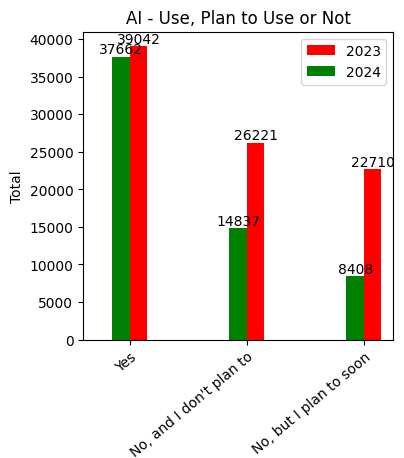

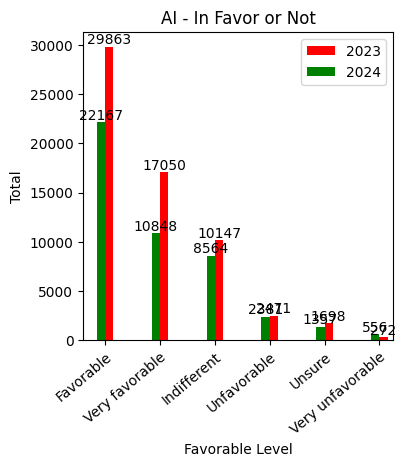

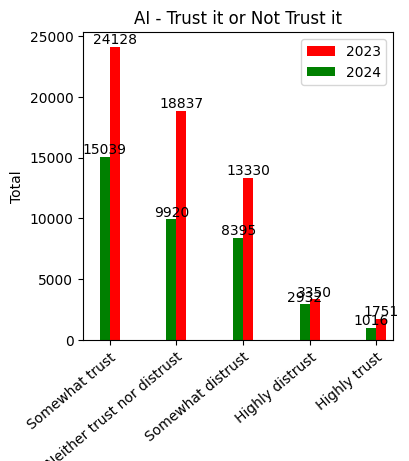

In [16]:
#1. Read the CSV files into pandas DataFrames:
df_2023 = pd.read_csv('new_survey_2023.csv')
df_2024 = pd.read_csv('new_survey_2024.csv')

#2. Create 3 bar chart with separate bars per Ai Use or notwith, Favor Level & Trust Level per year:
#Plan Use or Not 2023 vs 2024
fig1, ax = plt.subplots(figsize=(4, 4))
df_2023['AISelect'].value_counts()[:10].plot(kind='bar', position=0, width=0.15, color='red', align='center', label='2023', ax=ax)
df_2024['AISelect'].value_counts()[:10].plot(kind='bar', position=1, width=0.15, color='green', align='center', label='2024', ax=ax)

#Label + title setup
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xlabel('AI Use or Not')
plt.ylabel('Total')
plt.xticks(rotation=40,horizontalalignment="right", wrap=True)
plt.title('AI - Use, Plan to Use or Not')
plt.legend()
plt.show()
##
#In Favor or Not or Not 2023 vs 2024
fig2, ax = plt.subplots(figsize=(4, 4))
df_2023['AISent'].value_counts()[:10].plot(kind='bar', position=0, width=0.15, color='red', align='center', label='2023', ax=ax)
df_2024['AISent'].value_counts()[:10].plot(kind='bar', position=1, width=0.15, color='green', align='center', label='2024', ax=ax)

#Label + title setup
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xlabel('Favorable Level')
plt.ylabel('Total')
plt.xticks(rotation=40,horizontalalignment="right", wrap=True)
plt.title('AI - In Favor or Not')
plt.legend()
plt.show()
##
#In Trust or Not or Not 2023 vs 2024, Note# in 2024 the name changed from AIBen to AIACC
fig3, ax = plt.subplots(figsize=(4, 4))
df_2023['AIBen'].value_counts()[:10].plot(kind='bar', position=0, width=0.15, color='red', align='center', label='2023', ax=ax)
df_2024['AIAcc'].value_counts()[:10].plot(kind='bar', position=1, width=0.15, color='green', align='center', label='2024', ax=ax)

#Label + title setup
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xlabel('Trust Level')
plt.ylabel('Total')
plt.xticks(rotation=40,horizontalalignment="right", wrap=True)
plt.title('AI - Trust it or Not Trust it')
plt.legend()
plt.show()

# **AI - Some Feedback and Reason Comments**

* In the following 4 Kernels you some feedback on opinions from users.

**Some highlights from the following 4 Kernels, the last 2 only showing the Top 10 answers:**
* AI is is good according to must, but not great at handling complex  task.
* Far most of the Respondent does not see AI as a Threat, but many have not made up their mind yet.
* Ethics some of the most mentioned: Misinformation, incorrect attribution, imitate people, replace jobs
* Some of the Biggest Challenges according the Respondents are: missing correct policies, lack of context of codebase, no trust in output/answers

In [17]:
#Some Reason Comments
df_complex = df_survey_2024['AIComplex'].value_counts()
df_complex

AIComplex
Good, but not great at handling complex tasks    12102
Bad at handling complex tasks                    11583
Neither good or bad at handling complex tasks     7706
Very poor at handling complex tasks               4415
Very well at handling complex tasks               1215
Name: count, dtype: int64

In [18]:
#Some AI Threat or not
df_aithreat = df_survey_2024['AIThreat'].value_counts()
df_aithreat

AIThreat
No              30423
I'm not sure     8878
Yes              5388
Name: count, dtype: int64

In [19]:
#Some AI Ethics - Top 10
df_ethics = df_survey_2024['AIEthics'].value_counts()
df_ethics.head(10)

AIEthics
Circulating misinformation or disinformation;Missing or incorrect attribution for sources of data;Biased results that do not represent diverse viewpoints                                                                                                                2997
Circulating misinformation or disinformation;Missing or incorrect attribution for sources of data                                                                                                                                                                        2993
Circulating misinformation or disinformation;Missing or incorrect attribution for sources of data;Replacing jobs without options for new employment opportunities;Biased results that do not represent diverse viewpoints;Imitating a person's likeness;Energy demand    2396
Circulating misinformation or disinformation                                                                                                                                         

In [20]:
#Some AI Challenges - Top 10
df_challenge = df_survey_2024['AIChallenges'].value_counts()
df_challenge.head(10)

AIChallenges
Don’t trust the output or answers;AI tools lack context of codebase,  internal architecture, and/or company knowledge                                                                                                                          5502
Don’t trust the output or answers                                                                                                                                                                                                              3404
AI tools lack context of codebase,  internal architecture, and/or company knowledge                                                                                                                                                            2192
Don’t trust the output or answers;AI tools lack context of codebase,  internal architecture, and/or company knowledge;We don’t have the right policies in place to reduce security risks                                                       1554
Don’t trust

# **Salary Trend over the Years (Random Jobs and Random Totals) + Line Charts**

# **2020**

* Back End Roles give the higher end of Salaries

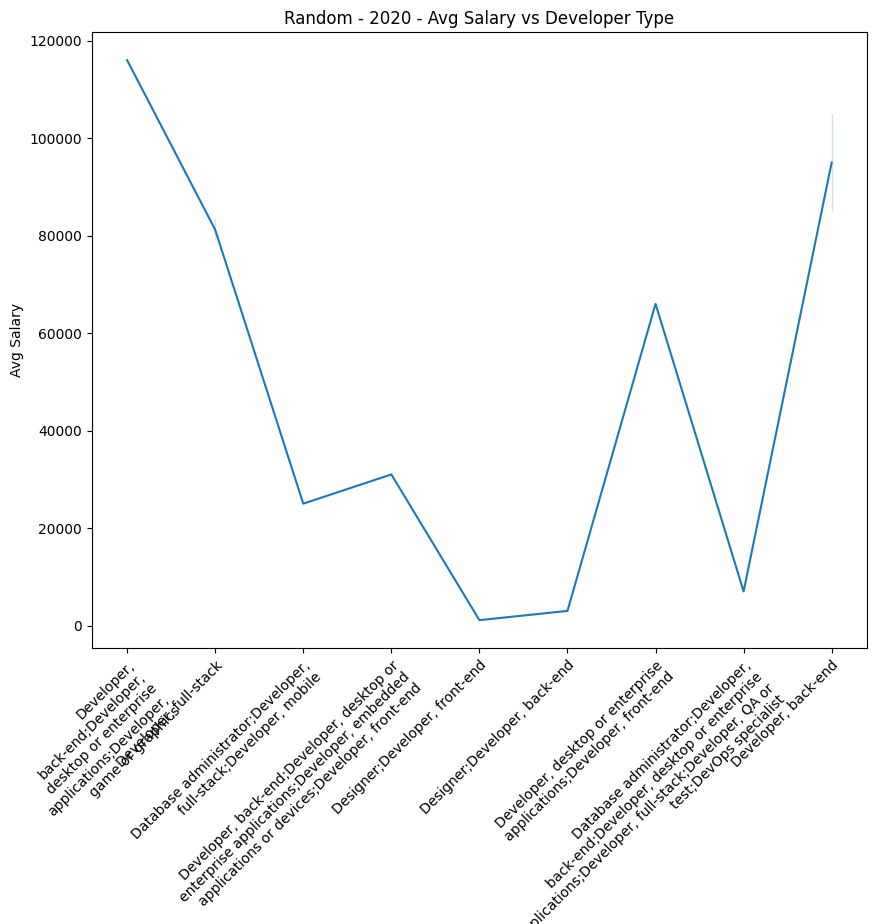

In [21]:
# Explicitly call `infer_objects(copy=False) 
df_survey_2020_new = df_survey_2020_new.infer_objects(copy=False)

# show random jobs 9 or 10, had to increase number head to get to this value
df_random_jobs_salary = df_survey_2020_new.head(24)

# Plot a line chart with NaN values handled
plt.figure(figsize=(10, 8))
sns.lineplot(x='DevType', y='CompTotal', data=df_random_jobs_salary)
plt.xlabel('Developer Type')
plt.ylabel('Avg Salary')
plt.title('Random - 2020 - Avg Salary vs Developer Type')
plt.xticks(rotation=45,horizontalalignment="right", wrap=True)
plt.show()

# **2021**

* Backend and Full Stack combined with Back or Front End gives the higher salary

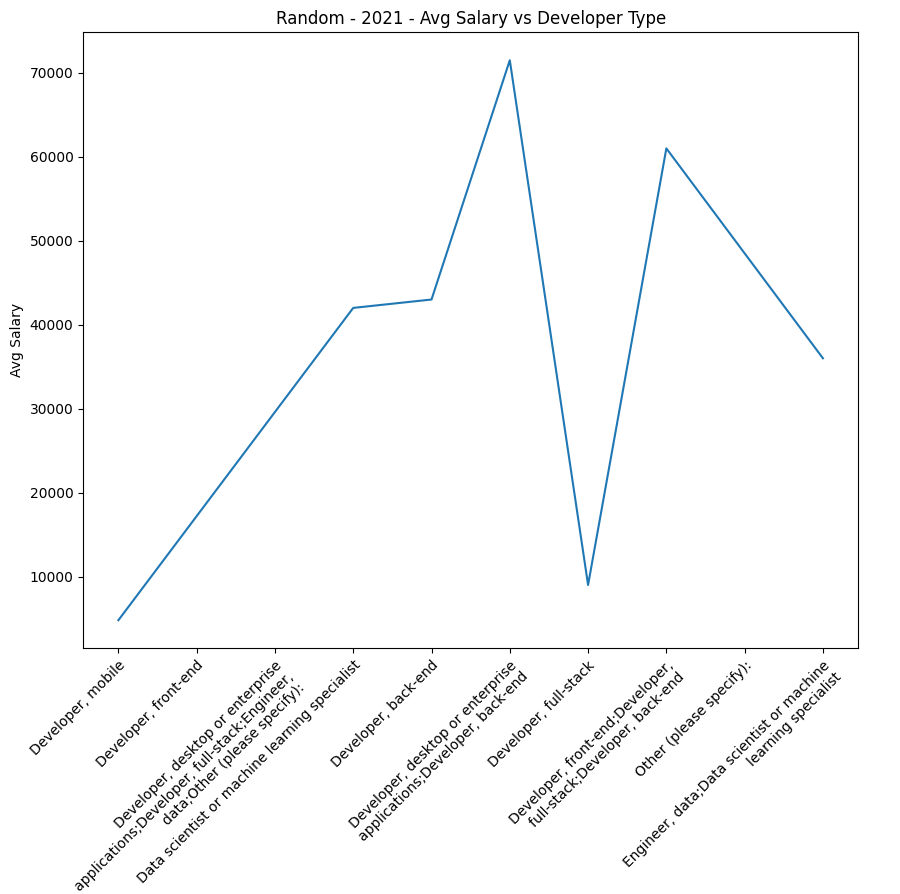

In [22]:
# Explicitly call `infer_objects(copy=False) 
df_survey_2021_new = df_survey_2021_new.infer_objects(copy=False)

# show random jobs 9 or 10, had to increase number head to get to this value
df_random_jobs_salary = df_survey_2021_new.head(24)

# Plot a line chart with NaN values handled
plt.figure(figsize=(10, 8))
sns.lineplot(x='DevType', y='CompTotal', data=df_random_jobs_salary)
plt.xlabel('Developer Type')
plt.ylabel('Avg Salary')
plt.title('Random - 2021 - Avg Salary vs Developer Type')
plt.xticks(rotation=45,horizontalalignment="right", wrap=True)
plt.show()

# **2022**

* Enginering Manager show the highest Salary.
* The other Random Roles are more less the in the same Salary range.

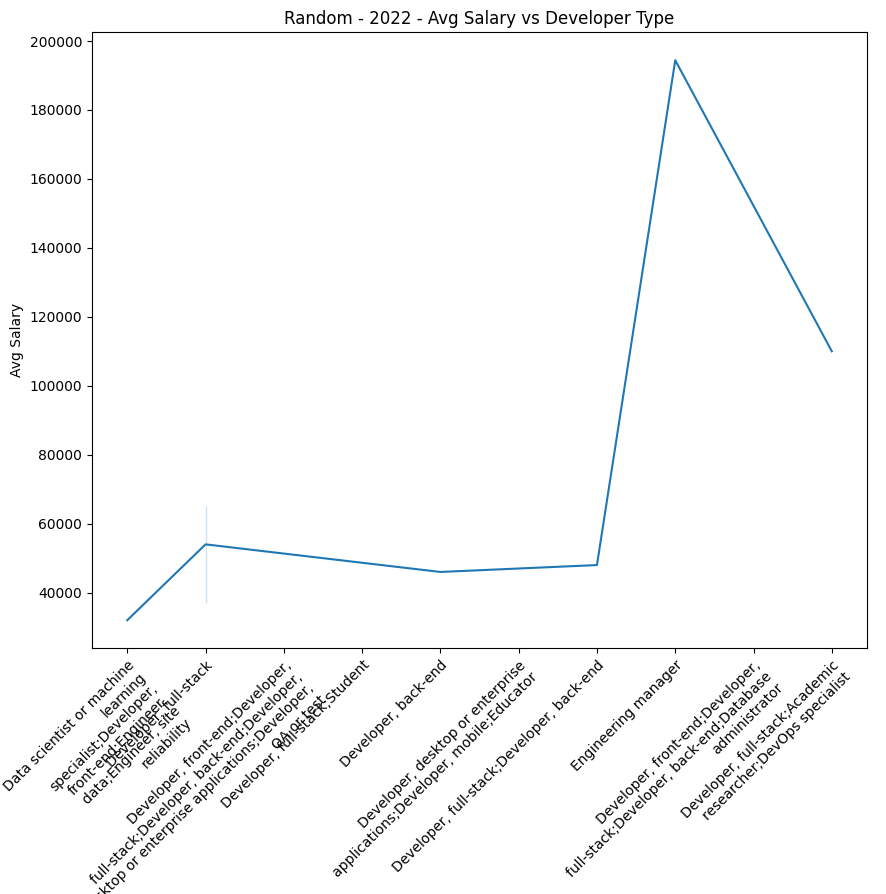

In [23]:
# Explicitly call `infer_objects(copy=False)
df_survey_2022_new = df_survey_2022_new.infer_objects(copy=False)

# show random jobs 9 or 10, had to increase number head to get to this value
df_random_jobs_salary = df_survey_2022_new.head(17)

# Plot a line chart with NaN values handled 
plt.figure(figsize=(10, 8))
sns.lineplot(x='DevType', y='CompTotal', data=df_random_jobs_salary)
plt.xlabel('Developer Type')
plt.ylabel('Avg Salary')
plt.title('Random - 2022 - Avg Salary vs Developer Type')
plt.xticks(rotation=45,horizontalalignment="right", wrap=True)
plt.show()

# **2023**

* For these random set of Jobs, The Data / Business Analyst get paid the most.

**Note**, Not sure why the Triangle shows up in this chart as its the same code as the others. Still learning :D

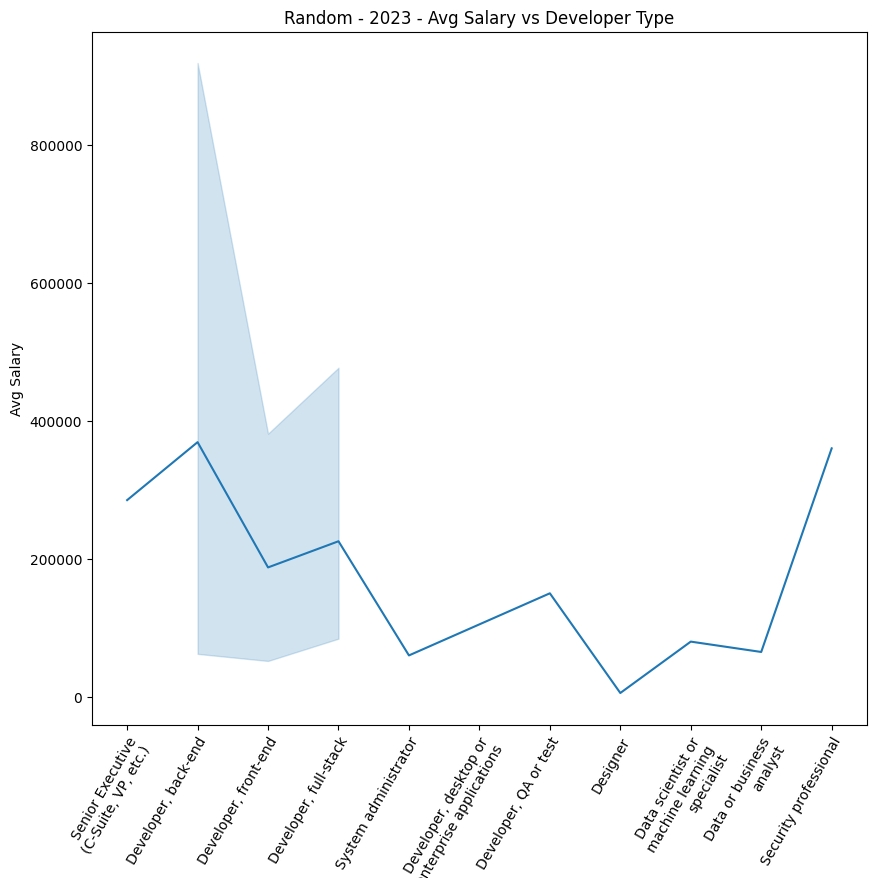

In [24]:
# Explicitly call `infer_objects(copy=False)
df_survey_2023_new = df_survey_2023_new.infer_objects(copy=False)

# show random jobs 9 or 10, had to increase number head to get to this value
df_random_jobs_salary = df_survey_2023_new.head(33)

# Plot a line chart with NaN values handled
plt.figure(figsize=(10, 9))
sns.lineplot(x='DevType', y='CompTotal', data=df_random_jobs_salary)
plt.xlabel('Developer Type')
plt.ylabel('Avg Salary')
plt.title('Random - 2023 - Avg Salary vs Developer Type')
plt.xticks(rotation=60,horizontalalignment="right", wrap=True)
plt.show()

# **2024**

Note: Many left either the Salary or DevType empty in 2024. Had to be a bit creative to show some salaries for Random jobs. I could not get rid of the overlap as it messed up the axes.
* Despite this it gives a nice picture on how big the difference can be for roll types.


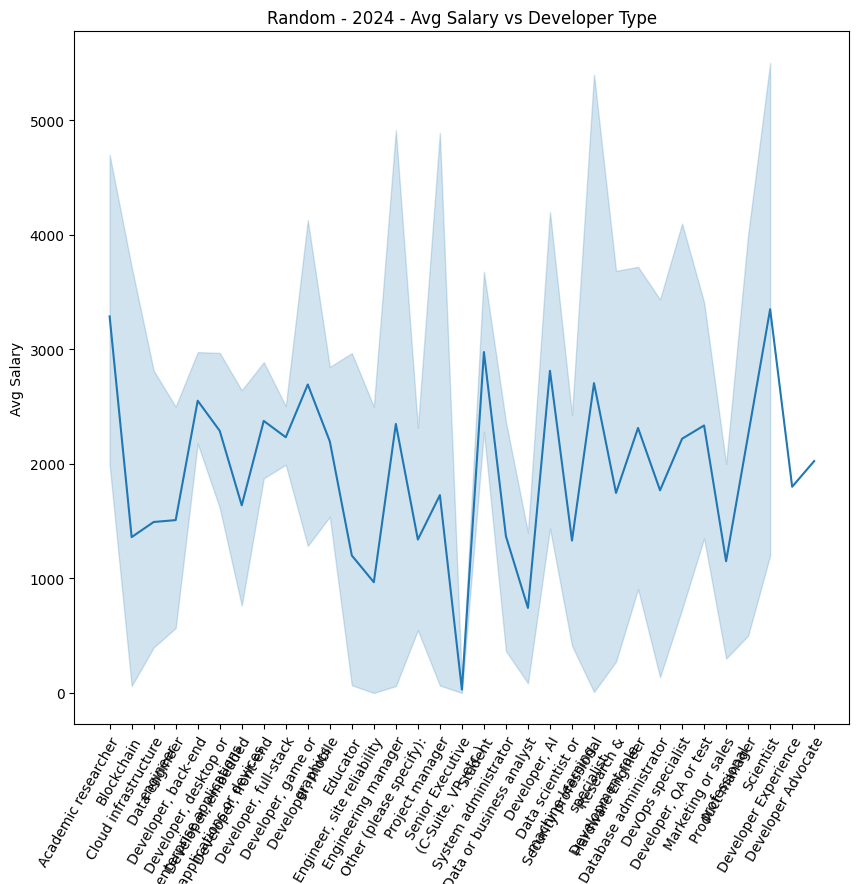

In [25]:
df_survey_2024_new = df_survey_2024_new.sort_values('DevType', ascending=True)


df_survey_2024_new = df_survey_2024_new.sort_values(['CompTotal', 'DevType'])
# Explicitly call `infer_objects(copy=False)
#df_survey_2024_new = df_survey_2024_new.infer_objects(copy=False)

# show random jobs 9 or 10, had to increase number head to get to this value
df_random_jobs_salary = df_survey_2024_new.head(800)

# Plot a line chart with NaN values handled
plt.figure(figsize=(10, 9))
sns.lineplot(x='DevType', y='CompTotal', data=df_random_jobs_salary)
plt.xlabel('Developer Type')
plt.ylabel('Avg Salary')
plt.title('Random - 2024 - Avg Salary vs Developer Type')
plt.xticks(rotation=60,horizontalalignment="right", wrap=True)
plt.show()



# **Top 10 Countries per Year + Bar Chart**

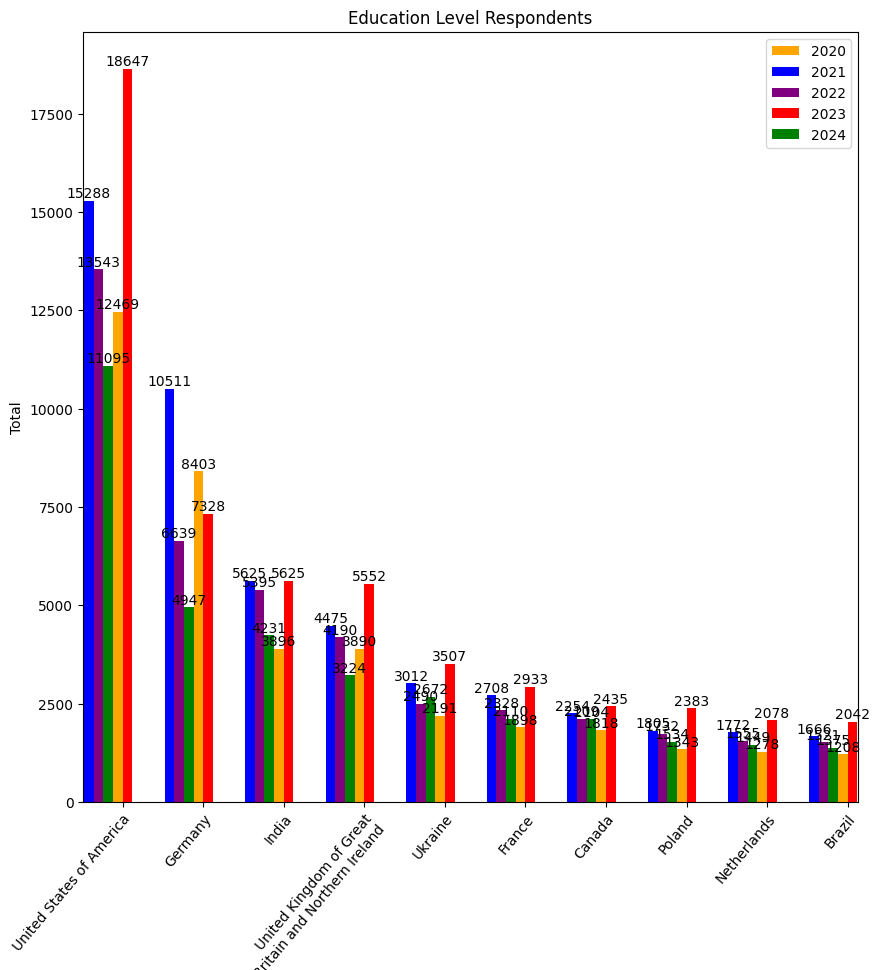

In [26]:
#1. Read the CSV files into pandas DataFrames:
df_2020 = pd.read_csv('new_survey_2020.csv')
df_2021 = pd.read_csv('new_survey_2021.csv')
df_2022 = pd.read_csv('new_survey_2022.csv')
df_2023 = pd.read_csv('new_survey_2023.csv')
df_2024 = pd.read_csv('new_survey_2024.csv')

#2. Create a bar chart with separate bars top 10 Country per year:

fig, ax = plt.subplots(figsize=(10, 10))
df_2020['Country'].value_counts()[:10].plot(kind='bar', position=1, width=0.12, color='orange', align='center', label='2020', ax=ax)
df_2021['Country'].value_counts()[:10].plot(kind='bar', position=4, width=0.12, color='blue', align='center', label='2021', ax=ax)
df_2022['Country'].value_counts()[:10].plot(kind='bar', position=3, width=0.12, color='purple', align='center', label='2022', ax=ax)
df_2023['Country'].value_counts()[:10].plot(kind='bar', position=0, width=0.12, color='red', align='center', label='2023', ax=ax)
df_2024['Country'].value_counts()[:10].plot(kind='bar', position=2, width=0.12, color='green', align='center', label='2024', ax=ax)

#Label + title setup
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])

plt.xlabel('Type of Education level per Year')
plt.ylabel('Total')
plt.xticks(rotation=50,horizontalalignment="right", wrap=True)
plt.title('Education Level Respondents')
plt.legend()
plt.show()

# **Conclusion**

* Most interesting part is the reducing of the respondents in 2024. At least 25000 less. It is not clear what the reason is
* From 2023 the question of Gender has disappeared, But by checking the totals between 2020 and 2022, it does not give much value. Male are always the highest
* From Languages used and wish to learn same for the Database are more less the same, but Python intrest is growing. See under each topic the charts and some observation notes
* in 2023 and more so in 2024 AI questions have been added. It will be interesting to see how this will progress as many use it and is favor, interstingly also must have trust issues for various reasons. See also each topic for some obeservation notes.

Lets see how May 2025 survey will look and how many will respond.

# **End Word**
The code for the Age Per Year, I tested the Lab in Coursera course I have done, they had a Lab write code with ChatGPT, although I was unable to get the label per age group nicely over each bar I am happy with the result result. Used for the Line charts as well, Although that still was very challenging and not fully working codes, As part of the training this was good as ChatGPT also analyze the errors and comes up with an alternative. In the end with ChatGPT and me messing around I got the charts working, but not fully as intented.

* Coursera Course - Generative AI: Enhance your Data Analytics Career

This was my 4th notebook, and I know I tend to go into the deep end and challenge myself. Now coming weeks I will 1st focus on try to understand why same code with different columns behave so differently and why simple codes sometimes work and other times absolutly not. Once I get more understanding in this, I will come back practise further, and try to learn more about SQL that I have come accross in the beginners courses I did.